## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [28]:
# Importing lybraries

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [29]:
#Loading data frame from CSV file. Using delimiter 
students_df = pd.read_csv("students-data.csv", sep=";")
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
# Checking columns and datatypes

students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [31]:
# Finding number of rows and columns
students_df.shape

(395, 33)

In [32]:
# Exploring dataset
students_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [33]:
#Find whether null value is there or not in the dataset
students_df[students_df.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## This indicates that there are no null value

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [34]:
#Printing all features which are non-numeric
print(students_df.select_dtypes(include=['object']).columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [35]:
#Printing all features which are numeric
print(students_df.select_dtypes(include=['object']).columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [36]:
# Printing dataframe without dropping columns
students_df.head(5).transpose()

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [37]:
#Finding the variance
students_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [38]:
#Dropping feature whose variance is less than 1
for column in students_df.select_dtypes(exclude=['object']).columns:
    if np.var(students_df[column]) < 1:
        students_df.drop([column], axis=1, inplace=True)

In [39]:
# Checking dataframe after dropping
students_df.head(5).transpose()

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [40]:
#Checking variance after dropping columns with var<1
students_df.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [41]:
#Printing dataframe without label encoding
students_df.head(5).transpose()

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [42]:
from sklearn import preprocessing                         
le=preprocessing.LabelEncoder()
stud_label_encode = students_df.apply(le.fit_transform)

In [43]:
stud_label_encode.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
school,0,0,0,0,0,0,0,0,0,0
sex,0,0,0,0,0,1,1,0,1,1
age,3,2,0,0,1,1,1,2,0,0
address,1,1,1,1,1,1,1,1,1,1
famsize,0,0,1,0,0,1,1,0,1,0
Pstatus,0,1,1,1,1,1,1,0,0,1
Medu,4,1,1,4,3,4,2,4,3,3
Fedu,4,1,1,2,3,3,2,4,2,4
Mjob,0,0,0,1,2,3,2,2,3,2
Fjob,4,2,2,3,2,2,2,4,2,2


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [45]:
# Converting G1, G2, G3 with >=10 as pass(1) and <10 as fail(0)
stud_label_encode['G1_O'] = stud_label_encode['G1']
stud_label_encode['G2_O'] = stud_label_encode['G2']
stud_label_encode['G3_O'] = stud_label_encode['G3']
stud_label_encode['G1'] = np.where(stud_label_encode['G1'] >=10, 1, 0)
stud_label_encode['G2'] = np.where(stud_label_encode['G2'] >=10, 1, 0)
stud_label_encode['G3'] = np.where(stud_label_encode['G3'] >=10, 1, 0)

In [47]:
stud_label_encode.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
school,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sex,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1
age,3,2,0,0,1,1,1,2,0,0,0,0,0,0,0,1,1,1,2,1
address,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
famsize,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1
Pstatus,0,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1
Medu,4,1,1,4,3,4,2,4,3,3,4,2,4,4,2,4,4,3,3,4
Fedu,4,1,1,2,3,3,2,4,2,4,4,1,4,3,2,4,4,3,2,3
Mjob,0,0,0,1,2,3,2,2,3,2,4,3,1,4,2,1,3,2,3,1
Fjob,4,2,2,3,2,2,2,4,2,2,1,2,3,2,2,2,3,2,3,2


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [48]:
#Look at the target column which is 'G3' to understand how the data is distributed amongst the various values
stud_label_encode.groupby(["G3"]).count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,goout,Walc,health,absences,G1,G2,G1_O,G2_O,G3_O
G3,,,,,,,,,,,,,,,,,,,,,
0,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,264,264,264,264,264
1,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131


In [49]:
#Select all rows and first 26 columns which are the attributes
X = stud_label_encode.iloc[:,0:26]
#Select all rows and the 27th column which is the classification "Pass", "Fail" for Student Grades
Y = stud_label_encode.iloc[:,26]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

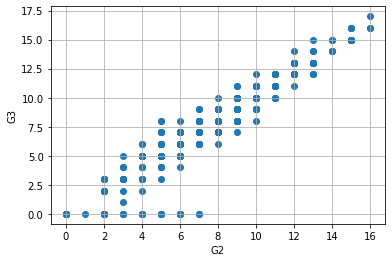

In [51]:
#Plotting scatter plot to understand the relationship between G2 and G3
plt.scatter(stud_label_encode["G2_O"], stud_label_encode["G3_O"])
plt.xlabel('G2')
plt.ylabel('G3')
plt.grid(True)
plt.show()

### Target attribute G3 has a strong correlation with G2. Thus, the G2 can be a good predictor of the outcome variable

In [54]:
stud_label_encode.corr()["G3"]

school       -0.054577
sex           0.064428
age          -0.123216
address       0.118691
famsize       0.037885
Pstatus      -0.007097
Medu          0.225414
Fedu          0.156748
Mjob          0.042897
Fjob          0.013638
reason        0.109193
guardian     -0.057831
schoolsup    -0.191051
famsup       -0.047004
paid          0.021284
activities    0.014405
nursery       0.078090
higher        0.138153
internet      0.113708
romantic     -0.065859
goout        -0.097986
Walc         -0.130179
health       -0.083766
absences     -0.084341
G1            0.730147
G2            0.896648
G3            1.000000
G1_O          0.746072
G2_O          0.771022
G3_O          0.763605
Name: G3, dtype: float64


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

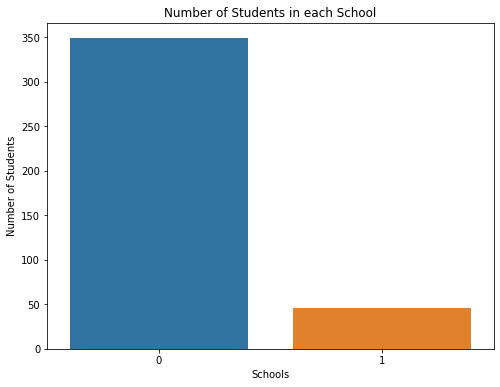

In [56]:
plt.figure(figsize=(8,6))
sx = sns.countplot(x='school',data=stud_label_encode)
sx.set_title('Number of Students in each School')
sx.set_xlabel('Schools')
sx.set_ylabel('Number of Students')
plt.show()

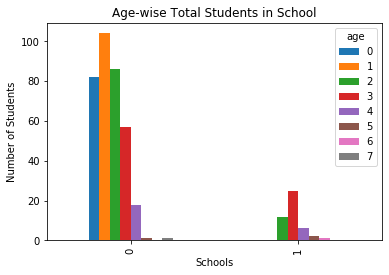

In [58]:
pd.crosstab(stud_label_encode.school, stud_label_encode.age).plot(kind='bar')
plt.title('Age-wise Total Students in School')
plt.xlabel('Schools')
plt.ylabel('Number of Students')
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [59]:
X = np.array(X)
Y = np.array(Y)
#Taking 70:30 training and test set
test_size = 0.30
#Random number seeding for reapeatability of the code
seed = 1  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(276, 26)
(119, 26)
(276,)
(119,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [60]:
#Invoking the logistics regression classifier function.
dt_model = LogisticRegression(random_state=seed)
dt_model.fit(X_train, Y_train)
print("Training Score: ", dt_model.score(X_train , Y_train))

Training Score:  0.9601449275362319


C:\Users\yogeshk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:

Y_predict = dt_model.predict(X_test)
print("Testing Score: ", dt_model.score(X_test , Y_test))

Testing Score:  0.9411764705882353


In [62]:
print(metrics.confusion_matrix(Y_test, Y_predict))

[[84  3]
 [ 4 28]]


### The result 
## 84 + 28= 112 correct predictions
## 3 + 4 = 7 incorrect predictions.

In [63]:
print(classification_report(Y_test, Y_predict))

NameError: name 'classification_report' is not defined

# Naive bayes with Iris data

### Import Iris.csv

In [65]:
#Loading data frame from CSV file.
df_iris = pd.read_csv("iris.csv")
df_iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
#Shape of the Data Frame
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [67]:
df_iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
#Any NaN values in the dataset
df_iris[df_iris.isnull().any(axis=1)]

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class


## No Null value found

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [69]:
#Let us first understand the values stored into categorical features
for column in df_iris.select_dtypes(include=['object']).columns:
    print("FEATURE NAME & VALUES = %s - %s"%(column, df_iris[column].unique()))

FEATURE NAME & VALUES = Class - ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Find the distribution of target variable (Class)

In [70]:
#Transforming Target Feature
df_iris = MultiColumnLabelEncoder(columns = ['Class']).fit_transform(df_iris)

NameError: name 'MultiColumnLabelEncoder' is not defined

In [72]:
#Validate transformation 
df_iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
#Validate transformation 
df_iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Plot the distribution of target variable using histogram

In [75]:
pd.value_counts(df_iris["Species"]).plot(kind="bar")

KeyError: 'Species'

In [71]:
#Select all rows and first 4 columns which are the attributes
X1 = df_iris.iloc[:,0:4]
#Select all rows and the 5th column which is the classification of Classes
Y1 = df_iris.iloc[:,4]
print(X1.shape)
print(Y1.shape)

(150, 4)
(150,)


In [76]:
df_iris["Class"].plot.hist()
plt.xlabel("Class") 
plt.ylabel("Number of Flowers")
plt.title("Histogram")
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

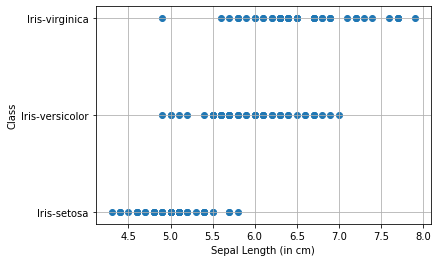

In [77]:
#Plotting scatter plot to understand the relationship between Sepal Length (in cm) and Class
plt.scatter(df_iris["Sepal Length (in cm)"], df_iris["Class"])
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Class')
plt.grid(True)
plt.show()

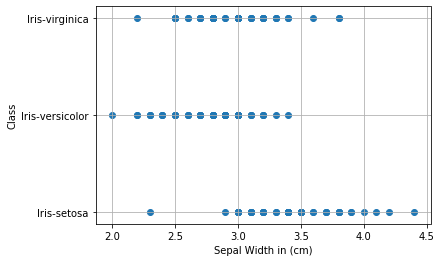

In [78]:
#Plotting scatter plot to understand the relationship between Sepal Width (in cm) and Class
plt.scatter(df_iris["Sepal Width in (cm)"], df_iris["Class"])
plt.xlabel('Sepal Width in (cm)')
plt.ylabel('Class')
plt.grid(True)
plt.show()

C:\Users\yogeshk\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Relationship between Petal Length and Width')

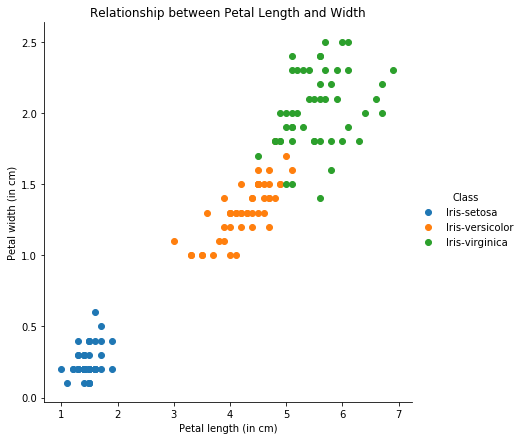

In [79]:
sns.FacetGrid(df_iris, hue="Class", size=6) \
   .map(plt.scatter, "Petal length (in cm)", "Petal width (in cm)") \
   .add_legend()
plt.title("Relationship between Petal Length and Width")

### Summary Statistics and explain insights for at least 2 variables

In [80]:
df_iris.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
Sepal Width in (cm),150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
Petal length (in cm),150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
Petal width (in cm),150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Class,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F939C19898>,
      dtype=object)

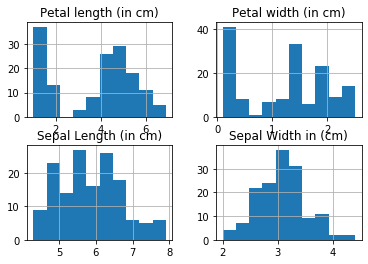

In [81]:
df_iris.hist()

### Correlation among all variables and give your insights

In [82]:
df_iris.corr()['Class']

KeyError: 'Class'

### Split data in Training and Validation in 80:20

In [83]:
X2 = np.array(X1)
Y2 = np.array(Y1)
#Taking 80:20 training and test set
test_size = 0.20
#Random number seeding for reapeatability of the code
seed = 1  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2, Y2, test_size=test_size, random_state=seed)

### Do Feature Scaling

In [84]:
X1['Petal length * Petal width (in cm)'] = X1['Petal length (in cm)'] * X1['Petal width (in cm)']
X1['Sepal length * Sepal width (in cm)'] = X1['Sepal Length (in cm)'] * X1['Sepal Width in (cm)']

X2 = np.array(X1)
Y2 = np.array(Y1)
#Taking 80:20 training and test set
test_size = 0.20
#Random number seeding for reapeatability of the code
seed = 1  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2, Y2, test_size=test_size, random_state=seed)
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train1, Y_train1)
print("Training Score: ", gnb_model.score(X_train1 , Y_train1))

#Invoking the GaussianNB classifier function.
Y_predict1 = gnb_model.predict(X_test1)
print("Testing Score: ", gnb_model.score(X_test1 , Y_test1))

Training Score:  0.9416666666666667
Testing Score:  0.9333333333333333


### Train and Fit NaiveBayes Model

In [87]:
poly = PolynomialFeatures(degree=2, include_bias = False) 
X2Poly = poly.fit_transform(X2)
#Taking 80:20 training and test set
test_size = 0.20
#Random number seeding for reapeatability of the code
seed = 1  
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X2Poly, Y2, test_size=test_size, random_state=seed)
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train1, Y_train1)
print("Training Score: ", gnb_model.score(X_train1 , Y_train1))

#Invoking the GaussianNB classifier function.
Y_predict1 = gnb_model.predict(X_test1)
print("Testing Score: ", gnb_model.score(X_test1 , Y_test1))

NameError: name 'PolynomialFeatures' is not defined

### Print Accuracy and Confusion Matrix and Conclude your findings

In [85]:
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train1, Y_train1)
print("Training Score: ", gnb_model.score(X_train1 , Y_train1))

#Invoking the GaussianNB classifier function.
Y_predict1 = gnb_model.predict(X_test1)
print("Testing Score: ", gnb_model.score(X_test1 , Y_test1))

Training Score:  0.9416666666666667
Testing Score:  0.9333333333333333


In [86]:
print(metrics.confusion_matrix(Y_test1, Y_predict1))

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
